# Fandango Movie Rating: Is Fandango Still Inflationg Ratings?
In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest ([Fandango](https://www.fandango.com/) is an online movie ratings aggregator). He published his analysis [in this article](https://fivethirtyeight.com/features/fandango-movies-ratings/) — a great piece of data journalism that's totally worth reading.

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.
![Image of Yaktocat](https://s3.amazonaws.com/dq-content/288/s1gp_fdg_stars.png)

Source: [Fandango](https://www.fandango.com/)

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

![Image of Yaktocat](https://s3.amazonaws.com/dq-content/288/s1gp_actual_vs_displayed.png)
Source: [FiveThirtyEight](https://fivethirtyeight.com/features/fandango-movies-ratings/)

The two distributions above are displayed using a simple line plot, which is also a valid way to show the shape of a distribution. The variable being examined is movie rating, and for each unique rating we can see its relative frequency (percentage) on the y-axis of the graph. When an analysis report is intended for large audiences, relative frequencies (especially percentages) are preferred over absolute frequencies.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

---

One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis.

- [before Hickey's study](https://github.com/fivethirtyeight/data/tree/master/fandango)
- [after](https://github.com/mircealex/Movie_ratings_2016_17)

In [1]:
#Reading the two data sets to understand their structure.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

beforedata = pd.read_csv("fandango_score_comparison.csv")
afterdata = pd.read_csv("movie_ratings_16_17.csv")

print(beforedata.shape)
print(afterdata.shape)

(146, 22)
(214, 15)


In [2]:
beforedata.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
afterdata.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [4]:
#Isolate thet offer information about Fandango's ratings in separate variables 
#so we have just the data we're interested in more 
#readily available for later use

selected_before = beforedata[["FILM","Fandango_Stars","Fandango_Ratingvalue"
                              ,"Fandango_votes","Fandango_Difference"]].copy() 
selected_after = afterdata[["movie","year","fandango"]] 

In [5]:
print(selected_before.shape)
print(selected_after.shape)

(146, 5)
(214, 3)


In [6]:
print(selected_before.head())

                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5  


In [7]:
print(selected_after.head())

                     movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
3          A Dog's Purpose  2017       4.5
4  A Hologram for the King  2016       3.0


## Determine whether the two samples are representative for the population we're trying to describe?
Our populations of intereset are Fandango ratings for popular movies in 2015-2016. Hickey's dataset contains only movies with at least 30 user reviews. We will use this value to determine whether the data from 2016 is representative  for the population or not. Firstly, we will create a random sample and check the amount of user's reviews.

In [8]:
selected_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


As of 2020 July, Fandango's 5-Star Fan Ratings have been replaced with the Rotten Tomatoes Audience Score. Therefore, below are the amount of Fandango user ratings for these movies as of 2018 April acquired from another source:

| Movie | Total Amount of Votes |
|---|---|
|Mechanic: Resurrection |2247|
|Warcraft|	7271|
|Max Steel	|493|
|Me Before You|	5263|
|Fantastic Beasts and Where to Find Them|	13400|
|Cell	|17|
|Genius	|127|
|Sully	|11877|
|A Hologram for the King|	500|
|Captain America: Civil War	|35057|

As we can see, 90% of our sample of movies from 2016 is representative of its corresponding population.

Our next step isolate the 2015 year from the before dataframe and the 2016 from the next one. The reason do this, because before dataset contains info about movies in 2014 and after dataset contains info about 2017 

In [9]:
#isolate the movies from both datasets
after = selected_after[selected_after["year"] == 2016].copy()
after["year"].value_counts()

2016    191
Name: year, dtype: int64

In [10]:
before = selected_before[selected_before["FILM"].str[-5:-1] == "2015"].copy()
before["FILM"].str[-5:-1].value_counts()

2015    129
Name: FILM, dtype: int64

## Comparing 2 Data Frames
After all these preliminary steps, we can now start analyzing the two samples we isolated before. Once again, our goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.
Let's start simple with making a two kernel density plots on the same figure for the distribution of movie rating of each sample.

([<matplotlib.axis.XTick at 0x7f8b6f2f0f60>,
 <a list of 10 Text xticklabel objects>)

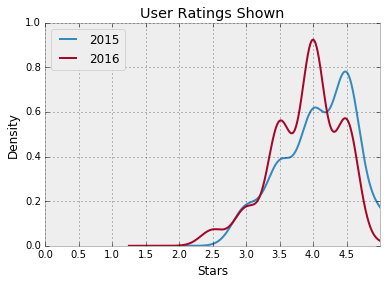

In [18]:
plt.style.use("bmh")
before["Fandango_Stars"].plot.kde(label = "2015", legend = True)
after["fandango"].plot.kde(label = "2016", legend = True)
plt.title("User Ratings Shown")
plt.xlabel("Stars")
plt.xlim(0,5)
plt.xticks(np.arange(0,5.0,.5))

We can see that both graphs are negatively skewed, with the shifted 2015 values slightly to the right. According to this, we can conclude that movies in 2016 were rated lower than in 2015. 

## Comparing Relative Frequencies

In [24]:
def freq_table(series):
    intervals = pd.interval_range(start = 2, end = 5, freq = 0.5)
    freq_table = pd.Series([0,0,0,0,0,0], index = intervals)
    
    for star in series:
        for interval in intervals:
            if star in interval:
                freq_table.loc[interval] += 1
                break
                
    freq_dist = round(freq_table/freq_table.sum() * 100,2)
    return pd.DataFrame({"Percentile" : freq_dist.values, "Stars" : freq_dist.index})

In [26]:
print("Distribution of stars in 2015: ")
freq_table(before["Fandango_Stars"])

Distribution of stars in 2015: 


,Percentile,Stars
0,0.00,"(2.0, 2.5]"
1,8.53,"(2.5, 3.0]"
2,17.83,"(3.0, 3.5]"
3,28.68,"(3.5, 4.0]"
4,37.98,"(4.0, 4.5]"
5,6.98,"(4.5, 5.0]"


In [27]:
print("Distribution of stars in 2016: ")
freq_table(after["fandango"])

Distribution of stars in 2016: 


,Percentile,Stars
0,3.14,"(2.0, 2.5]"
1,7.33,"(2.5, 3.0]"
2,24.08,"(3.0, 3.5]"
3,40.31,"(3.5, 4.0]"
4,24.61,"(4.0, 4.5]"
5,0.52,"(4.5, 5.0]"


As a result, we can confirm our suspicion about the difference between two distributions
## For now, we will compute the summary statistics with the mean, median, and mode

In [37]:
before.rename({"FILM": "movie",
               "Fandango_Stars": "fandango"}, axis=1, inplace=True)
before_and_after = pd.concat([after, before[["movie", "year", "fandango"]]], axis=0, ignore_index=True)

In [40]:
mean15 = before_and_after[before_and_after["year"] == 2015]["fandango"].agg(np.mean)
mean16 = before_and_after[before_and_after["year"] == 2016]["fandango"].agg(np.mean)

median15 = before_and_after[before_and_after["year"] == 2015]["fandango"].agg(np.median)
median16 = before_and_after[before_and_after["year"] == 2016]["fandango"].agg(np.median)

mode15 = before_and_after[before_and_after["year"] == 2015]["fandango"].mode()[0]
mode16 = before_and_after[before_and_after["year"] == 2016]["fandango"].mode()[0]

In [41]:
summary_stats = pd.DataFrame({"2015" : [mean15,median15,mode15],
                             "2016" : [mean16,median16,mode16]}, index = ["mean","median","mode"])
summary_stats.head()

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

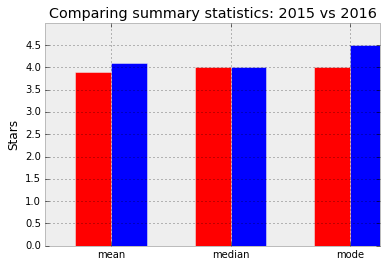

In [58]:
summary_stats["2015"].plot.bar(position = 0, width = .3, color = "blue")
summary_stats["2016"].plot.bar(position = 1, width = .3, color = "red")
plt.title("Comparing summary statistics: 2015 vs 2016")
plt.ylim(0,5)
plt.ylabel("Stars")
plt.yticks(np.arange(0,5.0,.5))
plt.xticks(rotation = "horizontal")

## Conclusion
The final graph shows us that median values are almost the same, but we can see the difference in mean (0.2) and in mode (the difference more higher ~ 0.5). We confirm again our conclusion made before. The rating in 2015 noticeable higher than in 2016, it means that Fondango somehow fix their issue with the system of ratings.